In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("svm.csv")

In [5]:
data.head()

,Temperature,Humidity,Pressure,Vibration,Light_Intensity,Target
0,-0.919743,0.671618,0.305916,0.690161,-0.702653,1
1,-0.177812,-0.732996,-0.844697,-0.253862,1.307785,0
2,0.061307,1.303170,-2.155331,-0.247754,-0.758519,0
3,0.826783,1.346161,-2.113704,-0.628009,-1.044202,1
4,1.833598,-0.860018,-1.340131,-1.441152,1.103106,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      4000 non-null   float64
 1   Humidity         4000 non-null   float64
 2   Pressure         4000 non-null   float64
 3   Vibration        4000 non-null   float64
 4   Light_Intensity  4000 non-null   float64
 5   Target           4000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.6 KB


In [20]:
cleaned_data = data.dropna()



In [21]:
cleaned_data.info(), cleaned_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      4000 non-null   float64
 1   Humidity         4000 non-null   float64
 2   Pressure         4000 non-null   float64
 3   Vibration        4000 non-null   float64
 4   Light_Intensity  4000 non-null   float64
 5   Target           4000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 187.6 KB


(None,
        Temperature     Humidity     Pressure    Vibration  Light_Intensity  \
 count  4000.000000  4000.000000  4000.000000  4000.000000      4000.000000   
 mean      0.050285     0.006311     0.006312     0.042806        -0.020648   
 std       1.482688     1.499680     1.465518     1.494786         1.460299   
 min      -6.162533    -5.542507    -4.606214    -4.699692        -5.075458   
 25%      -1.011690    -0.880693    -1.046637    -0.974364        -0.887232   
 50%       0.101303    -0.000246     0.048014     0.011008         0.033591   
 75%       1.049185     1.049262     1.006484     0.946285         1.041587   
 max       4.948604     6.256319     5.077425     6.172850         4.410043   
 
             Target  
 count  4000.000000  
 mean      0.500000  
 std       0.500063  
 min       0.000000  
 25%       0.000000  
 50%       0.500000  
 75%       1.000000  
 max       1.000000  )

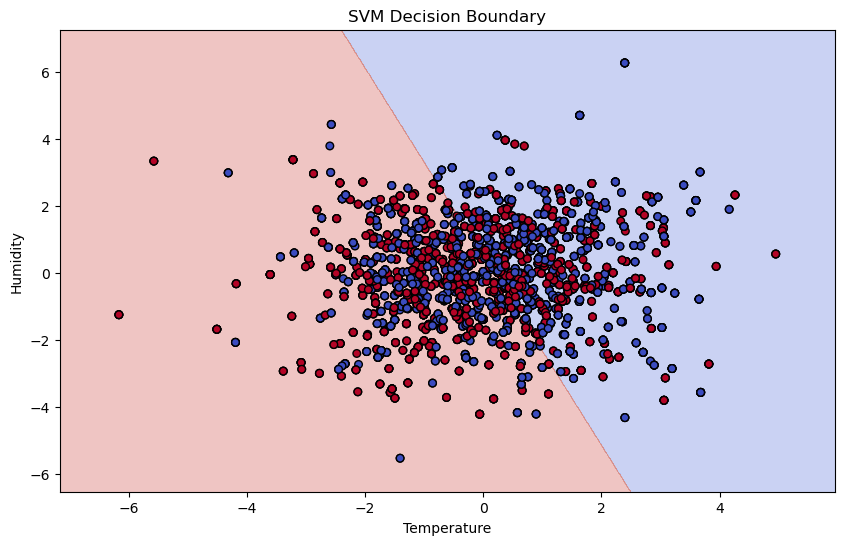

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Selecting two features for visualization and the target
features = ['Temperature', 'Humidity']
X = cleaned_data[features].values
y = cleaned_data['Target'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Training an SVM classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

# Plotting the decision boundary and data points
def plot_decision_boundary(X, y, model, features):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('SVM Decision Boundary')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.show()

# Visualize
plot_decision_boundary(X, y, svm_model, features)
